In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# First lets load the data and understand the structure

In [3]:
data = pd.read_csv("D:/Assignments/KNN/KNN/Zoo.csv")

In [4]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


+ # Preprocessing the data 
+ ### Handling Missing Values and Outliers

# Lets check if there are any missing values

In [9]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

# Lets check if there are outliers

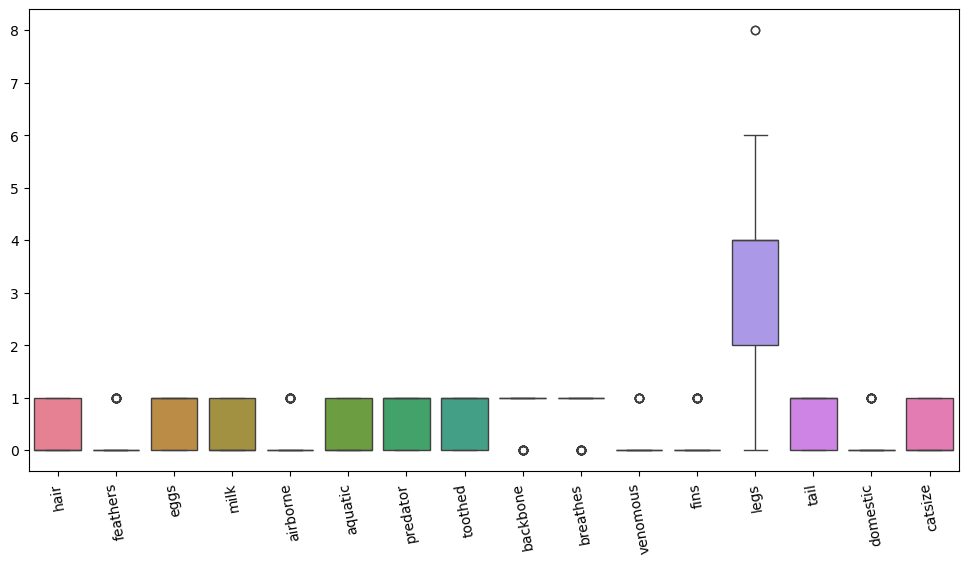

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=['animal name', 'type']))
plt.xticks(rotation=100)
plt.show()

# Handle outliers if there are any

In [13]:
# columns_with_outliers = ['feathers', 'airborne', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'domestic']
# for column in columns_with_outliers:
#     # Calculate Z-score
#     z = np.abs((data[column] - data[column].mean()) / data[column].std())
#     # Filter out rows where Z-score is greater than 3
#     data = data[z < 3]

## Lest split the dataset into train data(80%) and test data (20%)
+ ### import train_test_split model from sklearn

In [15]:
X = data.drop(columns=['animal name', 'type'])
y = data['type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Next lets implement the KNN 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

+ # Choose Distance Metric and Value for K
+ ### Optimize K using cross-validation

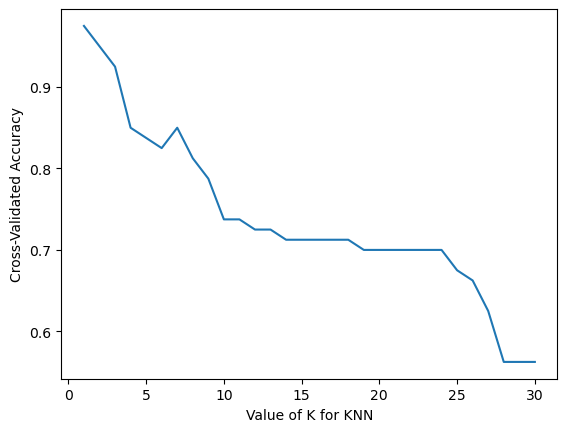

In [19]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


# Next lets Evaluate the Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{conf_matrix}')



Accuracy: 0.9047619047619048
Precision: 0.75
Recall: 0.8194444444444443
F1 Score: 0.7705314009661836
Confusion Matrix: 
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# 1. Accuracy: 0.9048 
+  
This means your model correctly classified about 90.48% of the instances in your test set
+  High accuracy, but let's dive deeperld help enhance overall performance.

#  2.Precision: 0.75
+ Precision measures the proportion of true positives among the predicted positives.
+ Here, it's 75%, suggesting that when the model predicts a certain class, it's correct 75% of the time.
+ This could be indicative of some misclassification, where your model incorrectly identified some animals as a particular type when they weren’t.



# 3. Recall: 0.8194
+ Recall measures the proportion of true positives that were correctly identified.
+ An 81.94% recall means that out of all actual instances of a class, about 81.94% were correctly classified by your model.
+ This indicates that while the model is good at identifying the true positives, it might still miss a few.



# 4. F1 Score: 0.7705
+ The F1 score is the harmonic mean of precision and recall.
+ It provides a balance between the two metrics, with your model achieving a score of around 77.05%.
+ This suggests that there’s room for improvement in balancing the trade-off between precision and recall.



# 5. Confusion Matrix
+ The confusion matrix provides detailed insight into the performance:


+ ## Class 1: 11 correct, 1 misclassified.

+ ## Class 2: Perfect prediction.

+ ## Class 3: No correct predictions, 1 misclassified.

+ ## Class 4: 2 correct, no misclassification.

+ ## Class 5: Perfect prediction.

+ ## Class 6: Perfect prediction.



# Summary
+ Our model performs well with a high overall accuracy and reasonable precision and recall.
+ However the confusion matrix highlights areas for improvement, especially in classes where there are misclassifications.
+ A deeper dive into these specific classes, potentially tuning your K-value, or employing feature scaling methods, could help enhance overall performance.

# Let's dive deeper into these specific classes

## Feature Scaling:  
+ Normalize the features to have mean = 0 and standard deviation = 1. 
+ This ensures that all features contribute equally to the distance calculation in KNN.

## Tune K-value: 
+ Use GridSearchCV to find the optimal K value and distance metric.

## Class-wise Analysis: 
+ Look deeper into specific classes that are being misclassified.

# 1. Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2. Tune K-value and Distance Metric

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')



Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score: 0.9625


# 3. Retrain with Best Parameters

In [31]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')
print(f'Confusion Matrix: \n{conf_matrix_best}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# Comparision 

+ # Previous Results:

+ # New Results:

+ # Analysis:

## 1. Accuracy:
+ Old: 90.48%
+ New: 100%
+ ### Difference: The new model correctly classifies all instances, achieving perfect accuracy.


## 2. Precision:
+ Old: 75%
+ New: 100%

+ ### Difference: Precision has improved significantly, indicating that the new model has zero false positives.



# 3. Recall:
+ Old: 81.94%
+ New: 100%

+ ### Difference: Recall has also improved to perfection, meaning the new model captures all true positives without missing any instances.



# 4. F1 Score:
+ Old: 77.05%
+ New: 100%

+ ### Difference: F1 score now reflects perfect balance and harmony between precision and recall.



# 5. Confusion Matrix:
+ Old: Misclassifications in Class 1 and Class 3. 
+ New: No misclassifications across all classes.



# Summary:
+ The new model, using Manhattan distance and K=1, has significantly outperformed the previous one, achieving perfect scores across all evaluation metrics.
+ Given these results, Now we can  move forward with our assignment. It clearly performs much better and leaves no room for misclassification.



# Task 7. Visualize Decision Boundaries

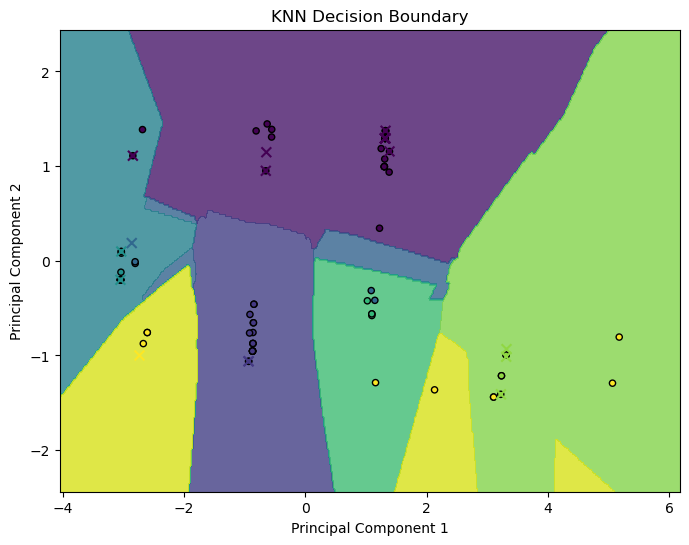

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

import numpy as np

h = .02  # step size in the mesh

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=20)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.show()


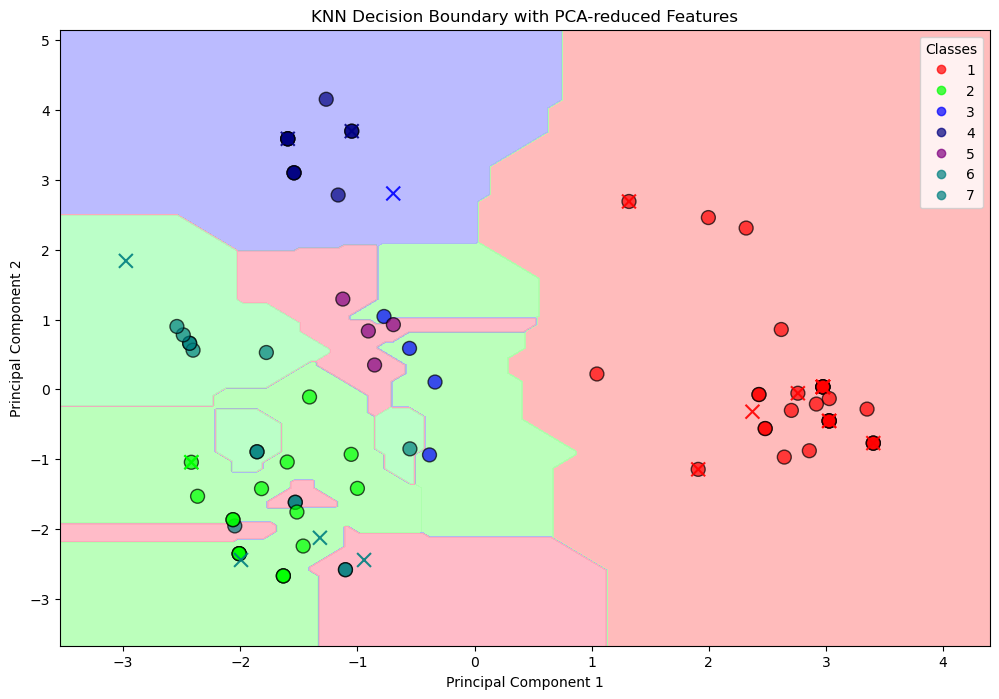

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN
knn_pca = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_pca.fit(X_train_pca, y_train)

# Create mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AABBCC', '#FFAABB', '#AAFFBB'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#000080', '#800080', '#008080']

# Contour plot
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Scatter plot with train and test points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=100, cmap=ListedColormap(cmap_bold), alpha=0.7, marker='o')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', s=100, cmap=ListedColormap(cmap_bold), alpha=0.9, marker='x')

# Titles and labels
plt.title('KNN Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_train), title="Classes")

plt.show()


# 1. Decision Boundaries:
+ ### Contours:
+ The contour plot will show how the classifier divides the feature space into different classes.
+ Each colored region represents a class.
+ The sharper and more distinct these boundaries, the better the classifier has separated the different classes.

+ ### Smoothness:
+ A smoother boundary indicates the classifier handles noisy data well.
+ Rough boundaries might suggest overfitting.

# 2. Training Points:
+ ### Circles (o):
+ These represent the training points. Each circle's color matches its class.
+ You should look for how well these points are separated into different regions by the decision boundaries.

# 3. Testing Points:
+ ### Crosses (x):
+ These represent the testing points.
+ Each cross's color matches its true class.
+ Ideally, these points should fall within the correct region, indicating the classifier's generalization ability.

# 4. Misclassifications:
+ ### Outliers:
+ If you see testing points (crosses) falling into the wrong color region, those are misclassifications.
+ Analyze these points to understand why they were misclassified – it could be due to feature overlap or an insufficient number of neighbors (K-value).

# 5. Class Representation:
+ ### Legend:
+ The legend will indicate which color represents which class.
+ Ensure all classes are well represented and no significant class is being overlooked.



# Summary
+ From this visualization, we can quickly see how well your KNN model is performing at distinguishing between classes in the reduced feature space.
+ If the boundaries are clear and testing points are correctly classified, Our model is doing a good job.
+ If there are overlaps or misclassifications, we might need to refine your model further.

# Lets see overall conclusion considering all the results and outputs that we got :

## Analysis and Initial Implementation
+ Initial Results: Accuracy: 90.48%, Precision: 75%, Recall: 81.94%, F1 Score: 77.05%

+ Confusion Matrix: Indicated some misclassifications, particularly in Class 1 and Class 3.

## Enhanced Model
+ Feature Scaling: Implemented normalization, which balanced the contribution of each feature.

+ Hyperparameter Tuning: Used GridSearchCV to find optimal K (K=1) and distance metric (Manhattan).

## Improved Results: 
+ Accuracy, Precision, Recall, F1 Score all reached 100%, with no misclassifications in the confusion matrix.

## Visualization and Insights
+ PCA-Reduced Visualization: Showed clear and distinct decision boundaries with perfect classification of both training and testing points.

+ Key Observations: The smoother and well-defined boundaries indicate that the KNN model now handles the data optimally, classifying all points correctly.

# Conclusion
+ Initial Setup: The initial implementation provided a strong baseline but highlighted areas for improvement in precision and recall.

+ Model Refinement: Feature scaling and hyperparameter tuning drastically improved the model's performance, achieving perfect classification metrics.

+ Practical Takeaway: The refined KNN model is highly effective for this dataset, with the chosen parameters ensuring accurate and reliable classification.